<a href="https://colab.research.google.com/github/jwallat/colab_test/blob/master/keras_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

print(red)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [0]:
# Add type column
red['type'] = 1

white['type'] = 0

wines = red.append(white, ignore_index=True)

Correlation matrix


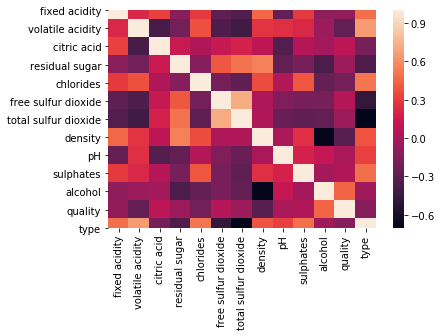

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = wines.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Split data into train and test


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
print(wines)
X = wines.iloc[:, :12]
print(X)

y = np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0               7.4              0.70         0.00  ...      9.4        5     1
1               7.8              0.88         0.00  ...      9.8        5     1
2               7.8              0.76         0.04  ...      9.8        5     1
3              11.2              0.28         0.56  ...      9.8        6     1
4               7.4              0.70         0.00  ...      9.4        5     1
...             ...               ...          ...  ...      ...      ...   ...
6492            6.2              0.21         0.29  ...     11.2        6     0
6493            6.6              0.32         0.36  ...      9.6        5     0
6494            6.5              0.24         0.19  ...      9.4        6     0
6495            5.5              0.29         0.30  ...     12.8        7     0
6496            6.0              0.21         0.38  ...     11.8        6     0

[6497 rows x 13 columns]
      fixed ac

Standardize data


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [16]:

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(12,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

2.0.0


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Train on 4352 samples
Epoch 1/50
4352/4352 [==============================] - 0s 52us/sample - loss: 0.0426 - accuracy: 0.9878
Epoch 2/50
4352/4352 [==============================] - 0s 39us/sample - loss: 0.0404 - accuracy: 0.9885
Epoch 3/50
4352/4352 [==============================] - 0s 42us/sample - loss: 0.0462 - accuracy: 0.9862
Epoch 4/50
4352/4352 [==============================] - 0s 42us/sample - loss: 0.0433 - accuracy: 0.9855
Epoch 5/50
4352/4352 [==============================] - 0s 41us/sample - loss: 0.0415 - accuracy: 0.9876
Epoch 6/50
4352/4352 [==============================] - 0s 43us/sample - loss: 0.0402 - accuracy: 0.9890
Epoch 7/50
4352/4352 [==============================] - 0s 40us/sample - loss: 0.0427 - accuracy: 0.9860
Epoch 8/50
4352/4352 [==============================] - 0s 42us/sample - loss: 0.0412 - accuracy: 0.9876
Epoch 9/50
4352/4352 [==============================] - 0s 42us/sample - loss: 0.0472 - accuracy: 0.9860
Epoch 10/50
4352/4352 [==========

Evaluate


In [21]:
score = model.evaluate(X_test, y_test, verbose=1)

print(score)

2145/2145 [==============================] - 0s 25us/sample - loss: 0.0668 - accuracy: 0.9837
[0.06676412891837527, 0.983683]
